<a href="https://colab.research.google.com/github/rjeevan2304/eda_da/blob/main/EDA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("GGally")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(GGally)
library(corrplot)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.95 loaded



In [4]:
data("airquality")
df <- airquality

In [6]:
cat("Dataset Overview:\n")
print(head(df))

Dataset Overview:
  Ozone Solar.R Wind Temp Month Day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6


In [7]:
cat("\nDataset Summary:\n")
print(summary(df))


Dataset Summary:
     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               


In [8]:
cat("\nDataset Structure:\n")
print(str(df))


Dataset Structure:
'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...
NULL


In [9]:
# Missing value analysis
cat("\nMissing Values Count:\n")
missing_values <- colSums(is.na(df))
print(missing_values)


Missing Values Count:
  Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0 


In [11]:
install.packages("tidyverse")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
# Handle missing values by imputing with column means
df <- df %>%
  mutate(across(everything(), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))

cat("\nMissing Values After Imputation:\n")
print(colSums(is.na(df)))


Missing Values After Imputation:
  Ozone Solar.R    Wind    Temp   Month     Day 
      0       0       0       0       0       0 


In [14]:
# Check for duplicate rows
cat("\nNumber of duplicate rows:\n")
sum(duplicated(df))


Number of duplicate rows:


[1] 0

**1) Univariant analysis**

1.1 Histogram

Warning message:
“Removed 37 rows containing non-finite outside the scale range (`stat_bin()`).”


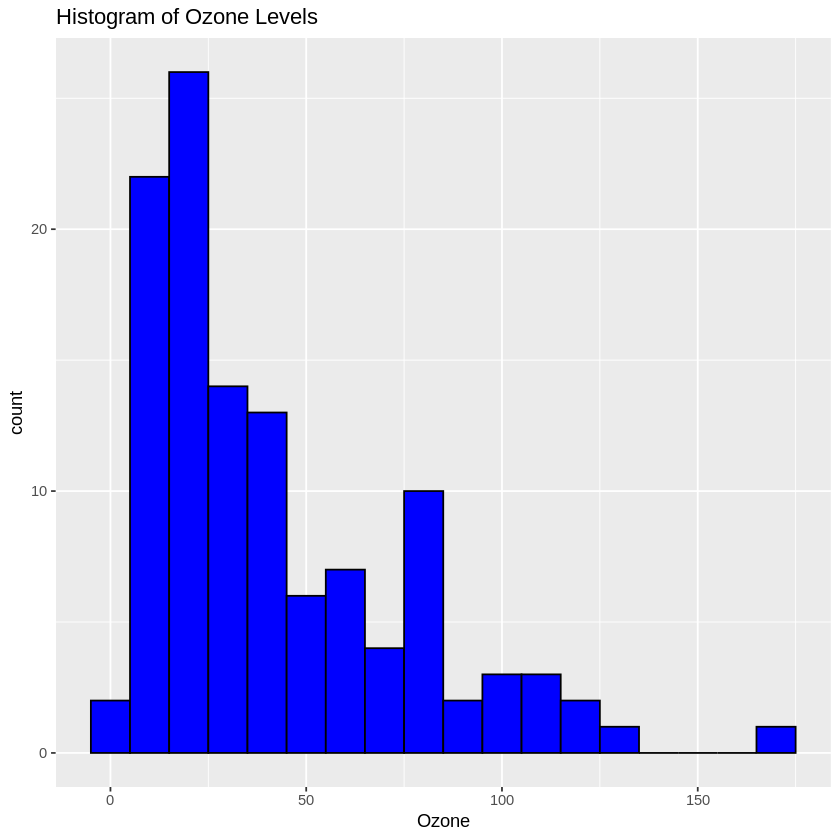

In [15]:
ggplot(airquality, aes(x = Ozone)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") +
  ggtitle("Histogram of Ozone Levels")

1.2 Density Plot

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_density()`).”


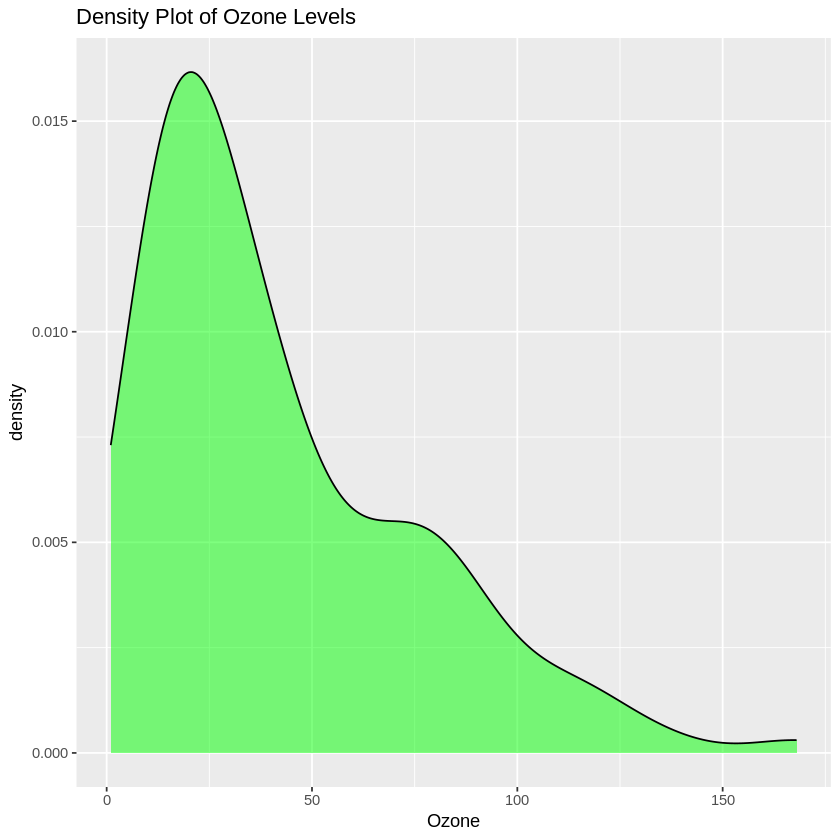

In [16]:
ggplot(airquality, aes(x = Ozone)) +
  geom_density(fill = "green", alpha = 0.5) +
  ggtitle("Density Plot of Ozone Levels")

1.3 Box plot

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


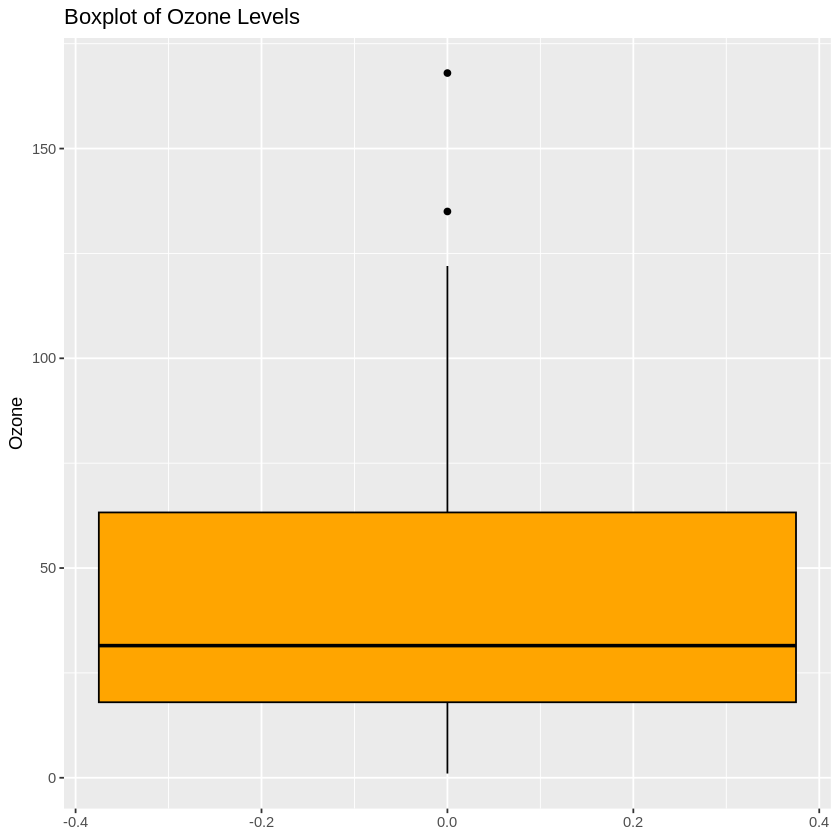

In [17]:
ggplot(airquality, aes(y = Ozone)) +
  geom_boxplot(fill = "orange", color = "black") +
  ggtitle("Boxplot of Ozone Levels")

1.4 Bar plot

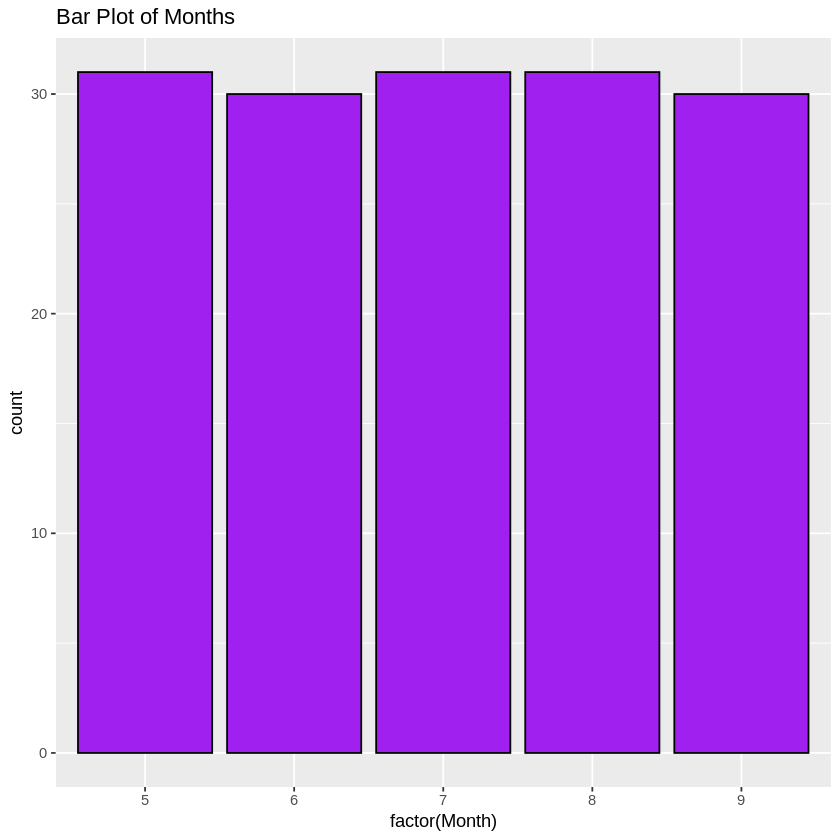

In [18]:
ggplot(airquality, aes(x = factor(Month))) +
  geom_bar(fill = "purple", color = "black") +
  ggtitle("Bar Plot of Months")

**2) Bivariate Visualizations**

2.1 Scatter Plot

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”


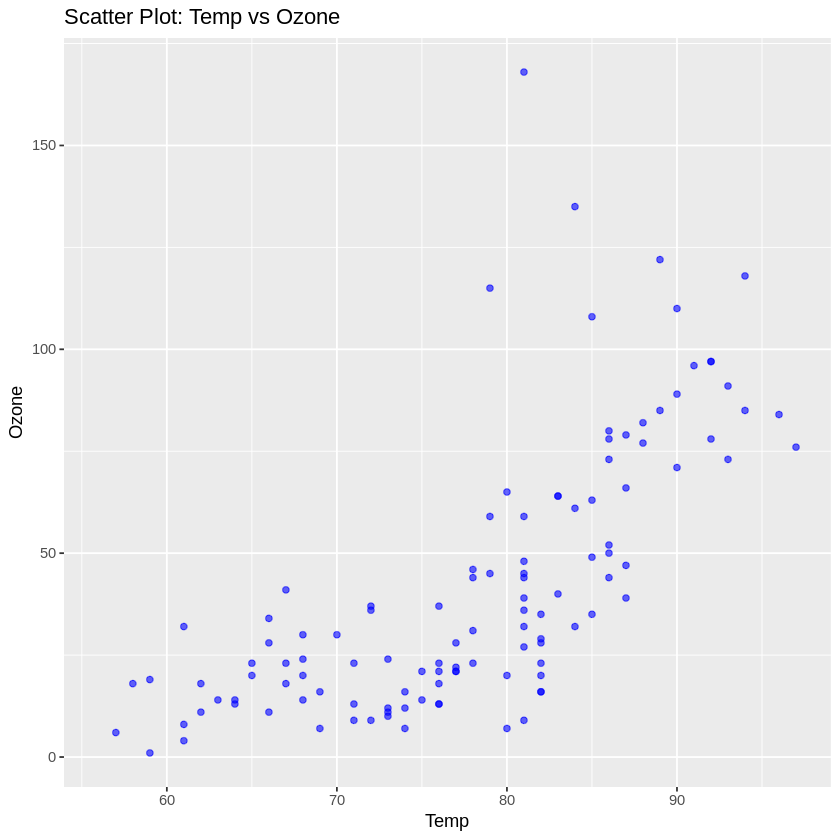

In [19]:
ggplot(airquality, aes(x = Temp, y = Ozone)) +
  geom_point(color = "blue", alpha = 0.6) +
  ggtitle("Scatter Plot: Temp vs Ozone")

2.2 Line Plot

Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_line()`).”


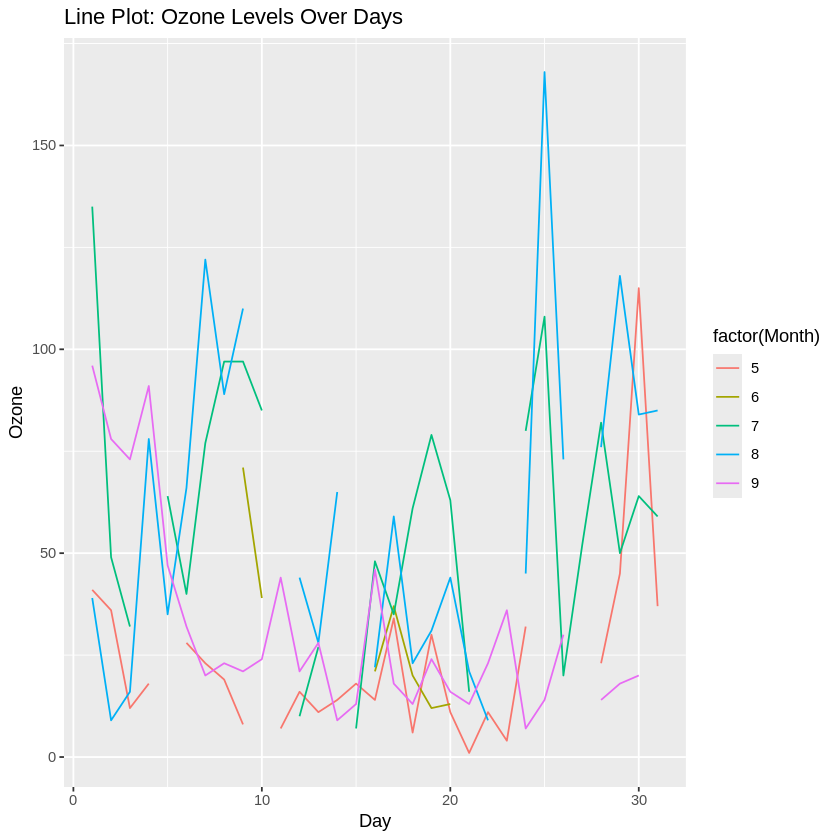

In [20]:
ggplot(airquality, aes(x = Day, y = Ozone, group = Month)) +
  geom_line(aes(color = factor(Month))) +
  ggtitle("Line Plot: Ozone Levels Over Days")

2.3 Boxplot (Categorical vs Numeric)

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


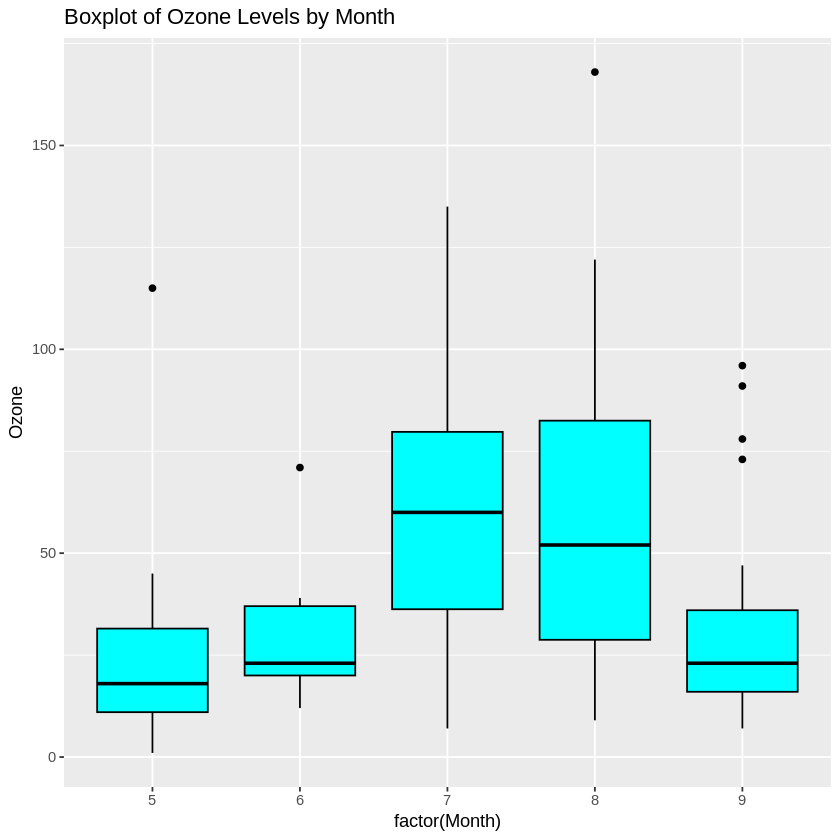

In [21]:
ggplot(airquality, aes(x = factor(Month), y = Ozone)) +
  geom_boxplot(fill = "cyan", color = "black") +
  ggtitle("Boxplot of Ozone Levels by Month")

2.4 Violin Plot

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


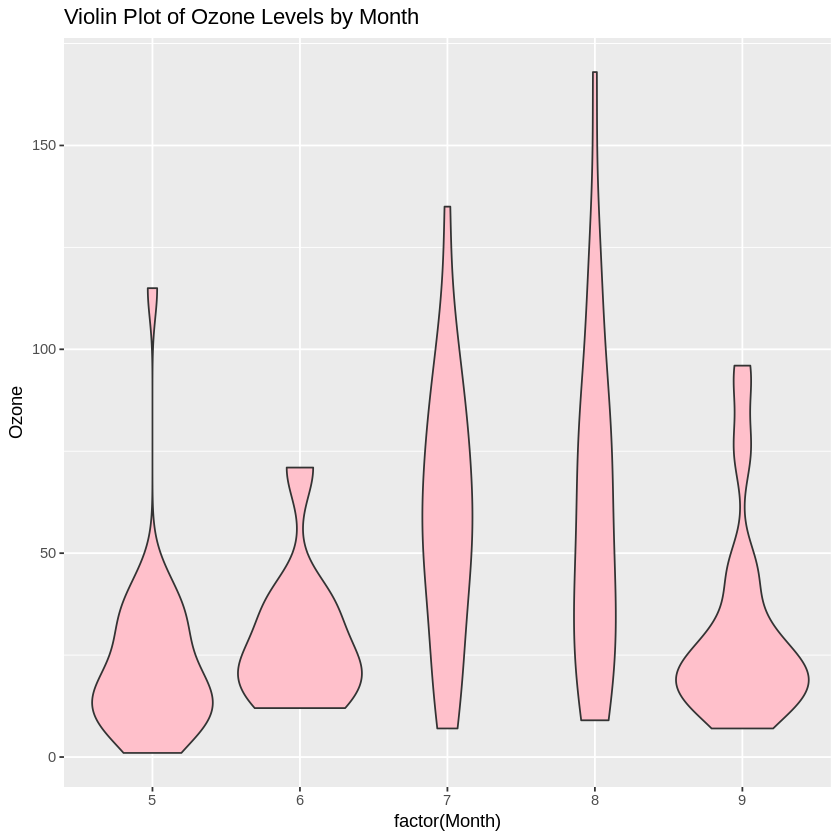

In [22]:
ggplot(airquality, aes(x = factor(Month), y = Ozone)) +
  geom_violin(fill = "pink") +
  ggtitle("Violin Plot of Ozone Levels by Month")

2.5 Heatmap

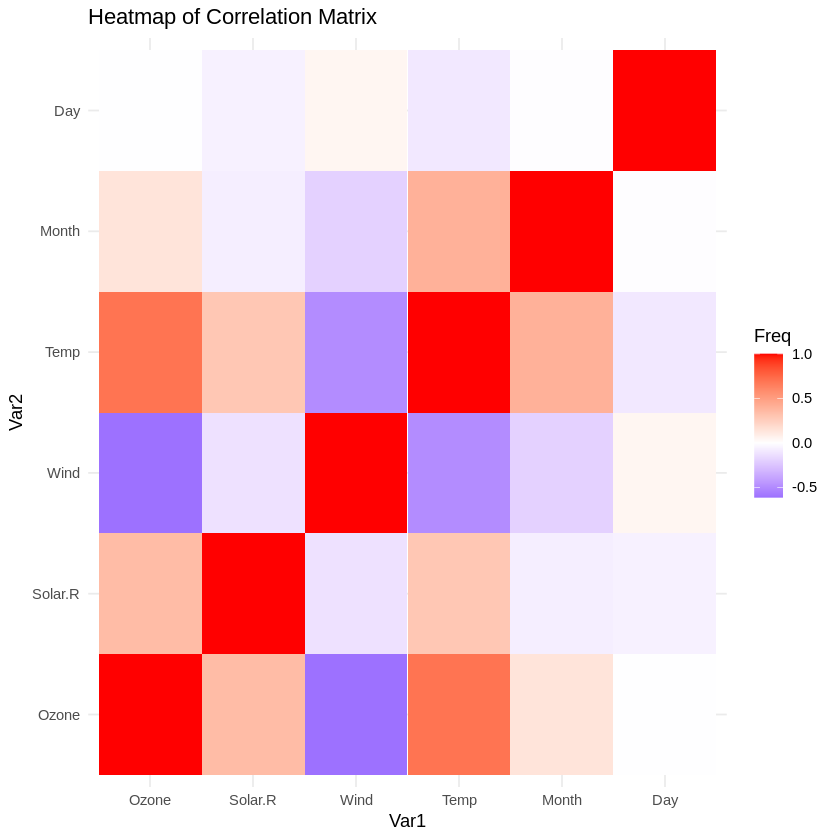

In [24]:
cor_matrix <- cor(airquality[, sapply(airquality, is.numeric)], use = "complete.obs")
melted_cor <- as.data.frame(as.table(cor_matrix))

ggplot(melted_cor, aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  ggtitle("Heatmap of Correlation Matrix") +
  theme_minimal()

2.6 Hexbin Plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_binhex()`).”


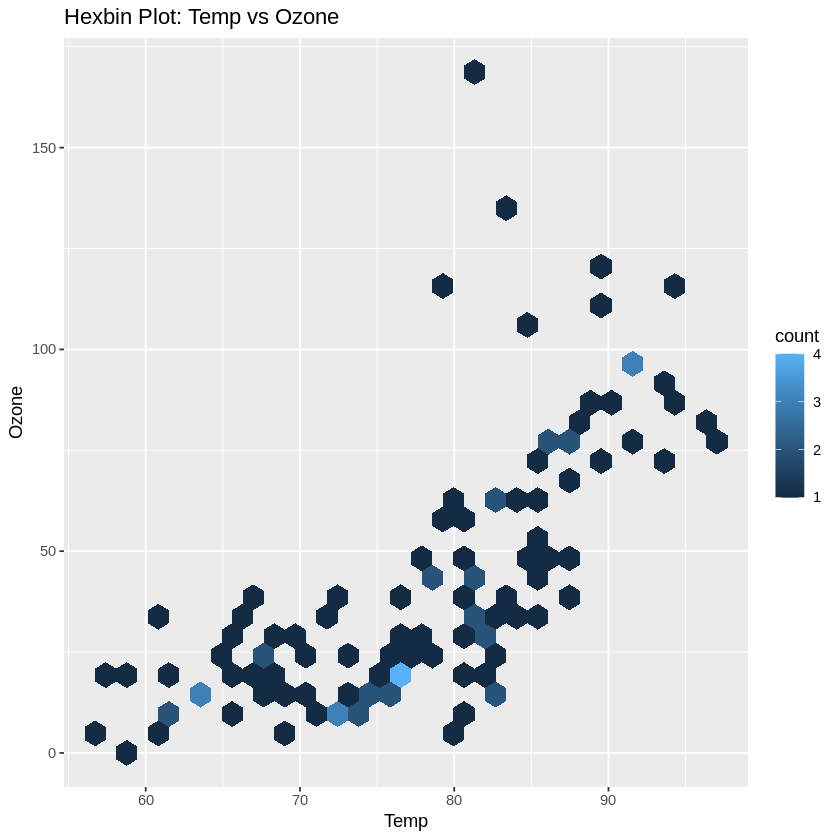

In [36]:
install.packages("hexbin")
library(hexbin)
ggplot(airquality, aes(x = Temp, y = Ozone)) +
  geom_hex() +
  ggtitle("Hexbin Plot: Temp vs Ozone")

2.7 Polar Charts

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_bar()`).”


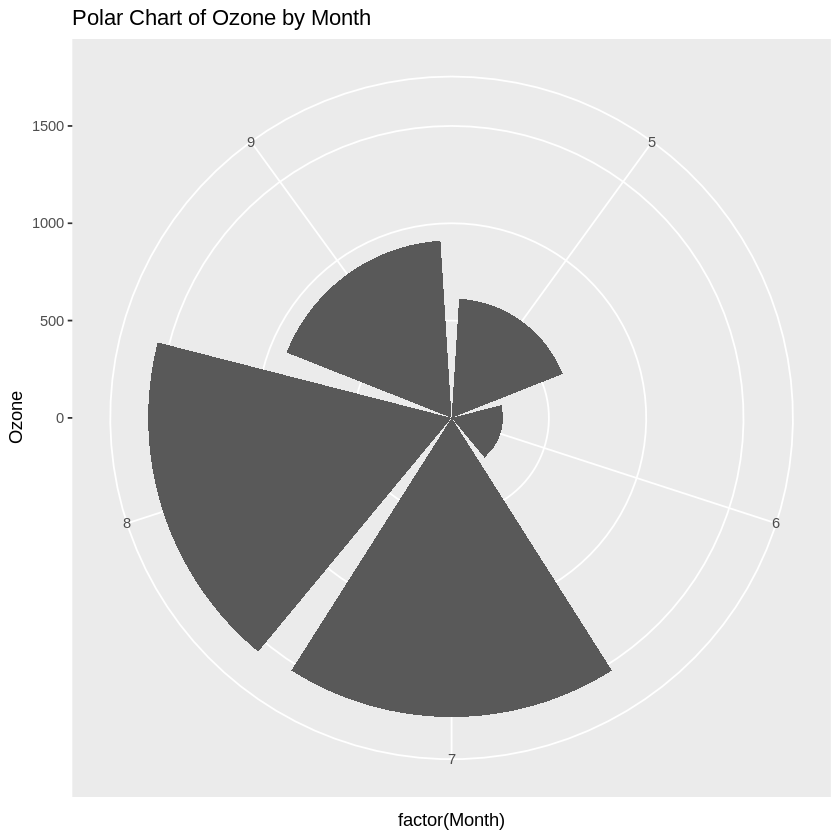

In [37]:
ggplot(airquality, aes(x = factor(Month), y = Ozone)) +
  geom_bar(stat = "identity") +
  coord_polar() +
  ggtitle("Polar Chart of Ozone by Month")

2.8 Slope Chart

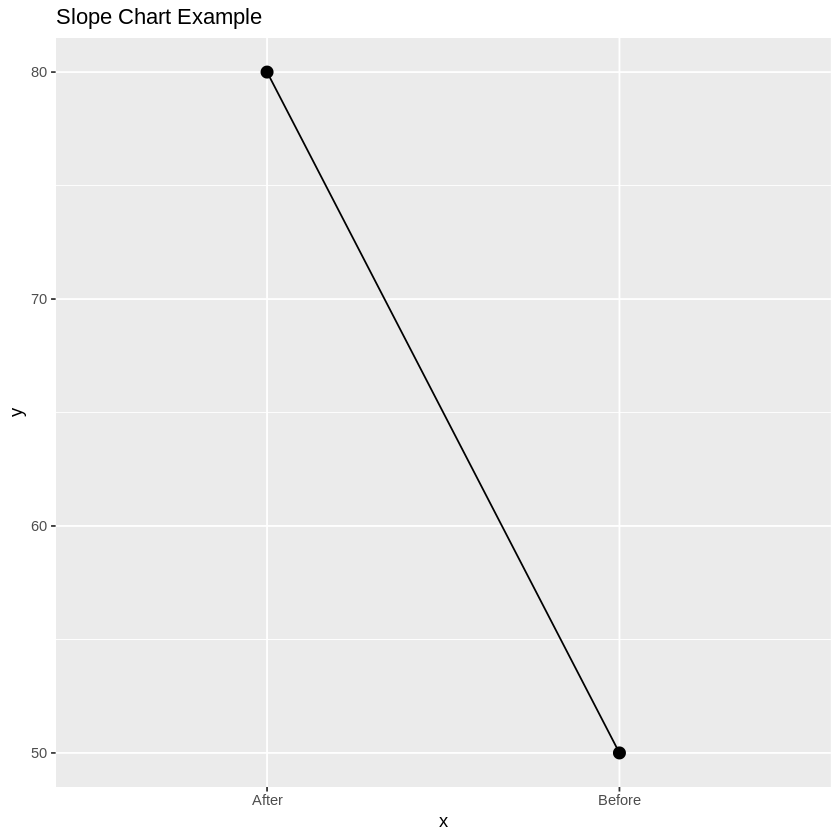

In [38]:
ggplot(data.frame(x = c("Before", "After"), y = c(50, 80)), aes(x, y, group = 1)) +
  geom_line() +
  geom_point(size = 3) +
  ggtitle("Slope Chart Example")

**3) Multivariate Visualizations**

3.1 Pair Plot

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 42 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 37 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 37 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 37 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 37 rows containing missing values”
Warning message:
“Removed 42 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data 

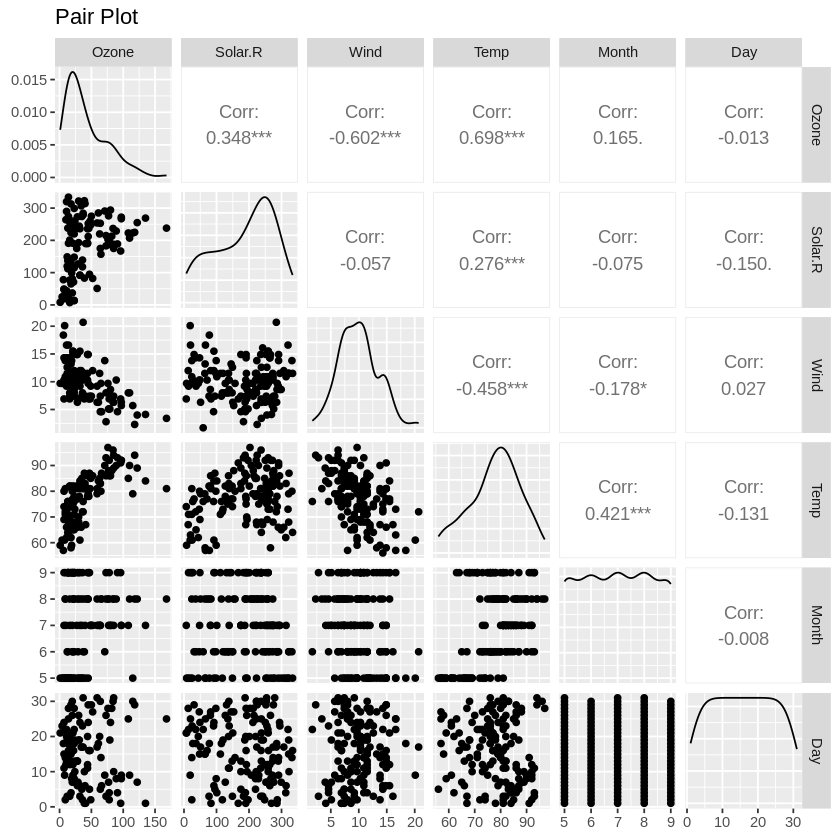

In [25]:
library(GGally)
ggpairs(airquality[, sapply(airquality, is.numeric)], title = "Pair Plot")

3.2 3D Scatter Plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



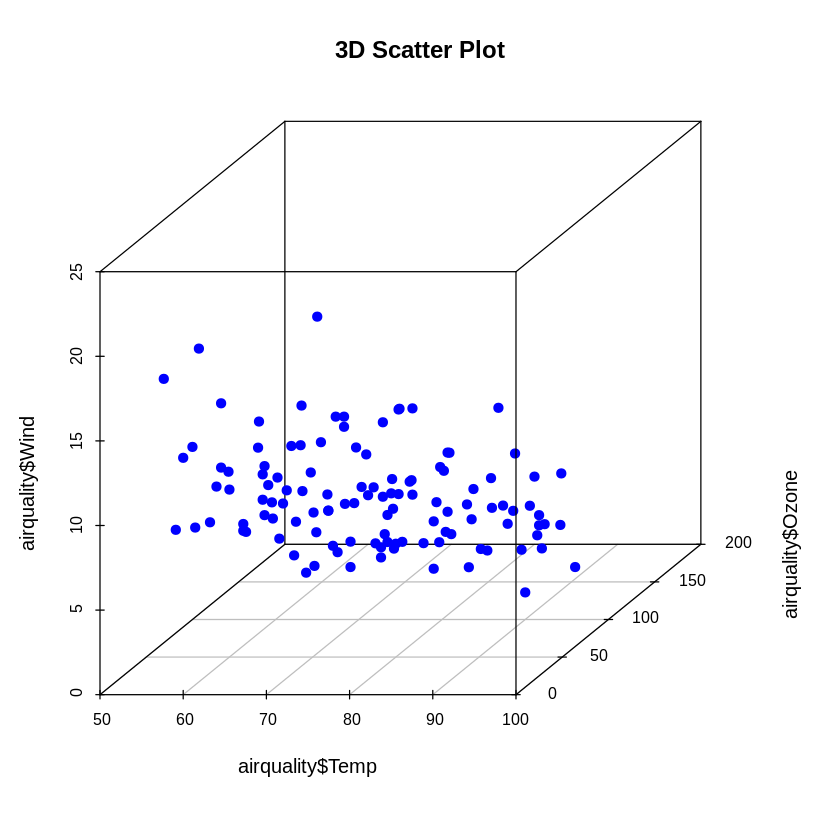

In [26]:
install.packages("scatterplot3d")
library(scatterplot3d)

scatterplot3d(
  airquality$Temp, airquality$Ozone, airquality$Wind,
  color = "blue", pch = 19, main = "3D Scatter Plot"
)

3.3 Bubble Chart

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”


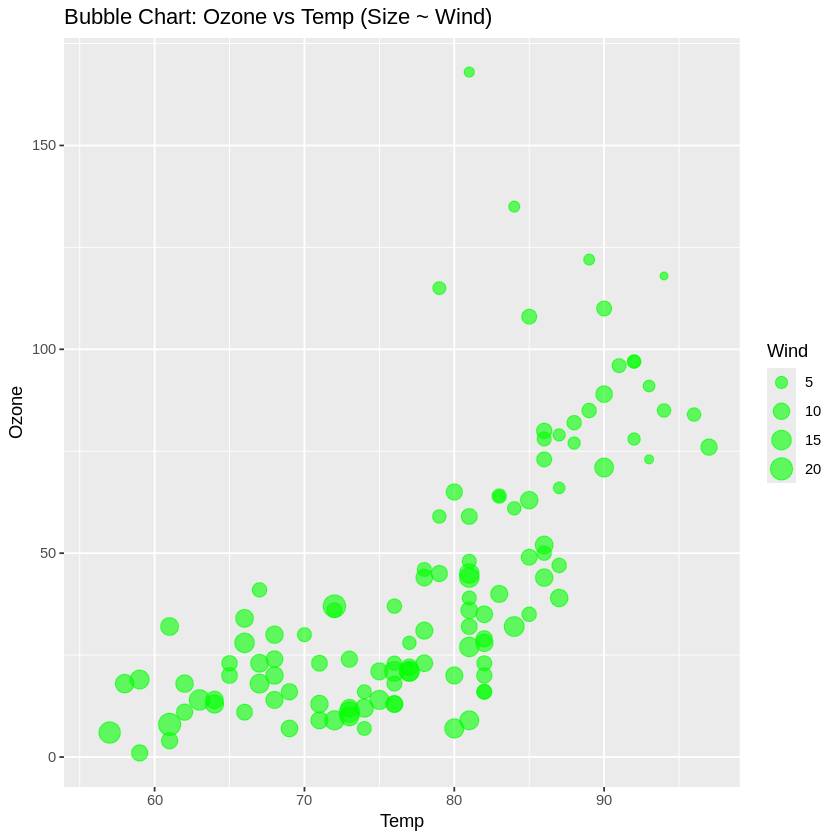

In [27]:
ggplot(airquality, aes(x = Temp, y = Ozone, size = Wind)) +
  geom_point(alpha = 0.6, color = "green") +
  ggtitle("Bubble Chart: Ozone vs Temp (Size ~ Wind)")

3.4 Facet Plot

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”


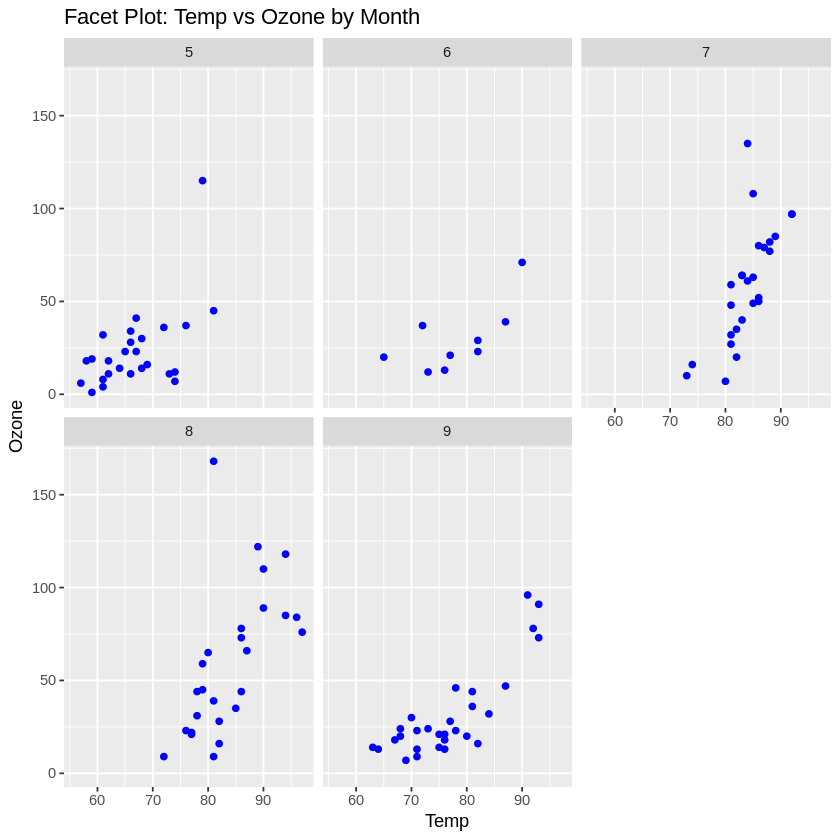

In [28]:
ggplot(airquality, aes(x = Temp, y = Ozone)) +
  geom_point(color = "blue") +
  facet_wrap(~Month) +
  ggtitle("Facet Plot: Temp vs Ozone by Month")

3.5 Parallel Coordinate Plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




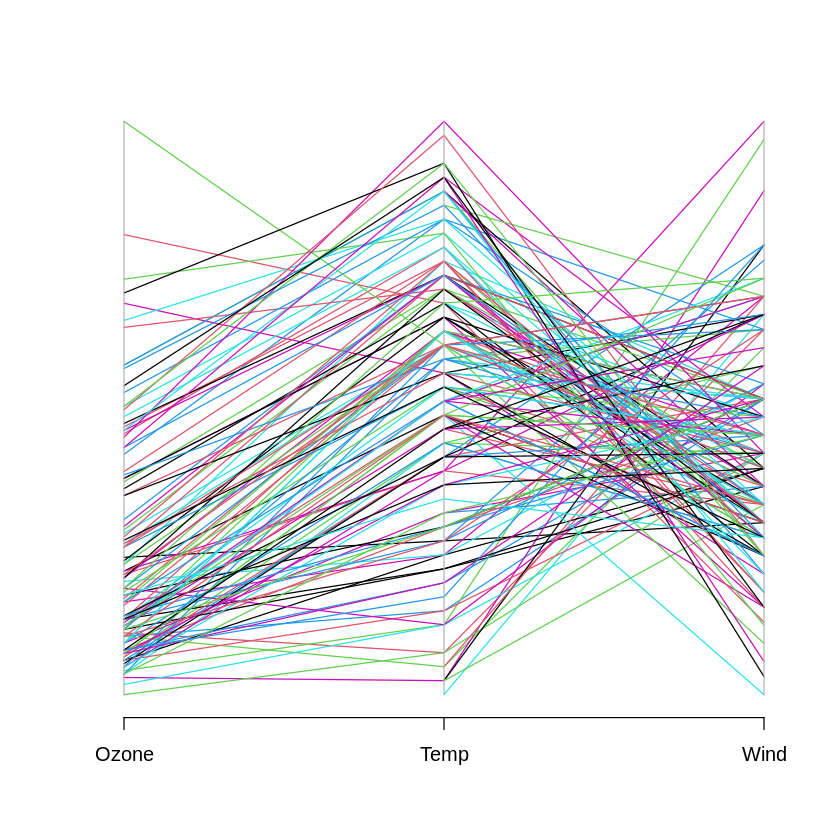

In [39]:
install.packages('MASS')
library(MASS)
parcoord(airquality[, c("Ozone", "Temp", "Wind")], col = 1:6)

3.6 Mosaic Plot

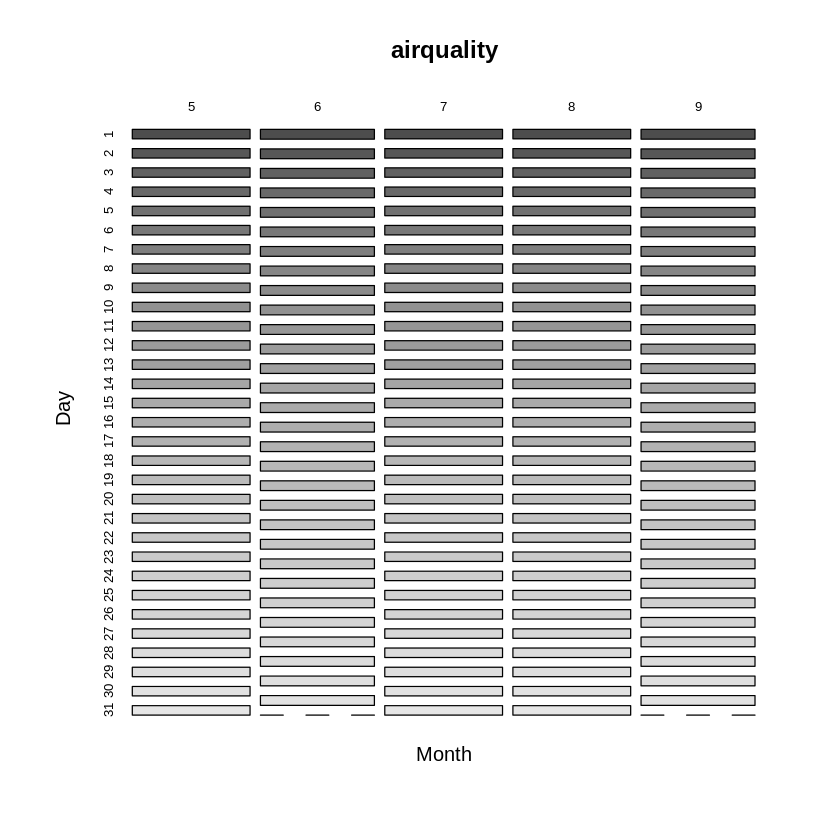

In [40]:
mosaicplot(~Month + Day, data = airquality, color = TRUE)

3.7 Grouped Bubble Chart

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”


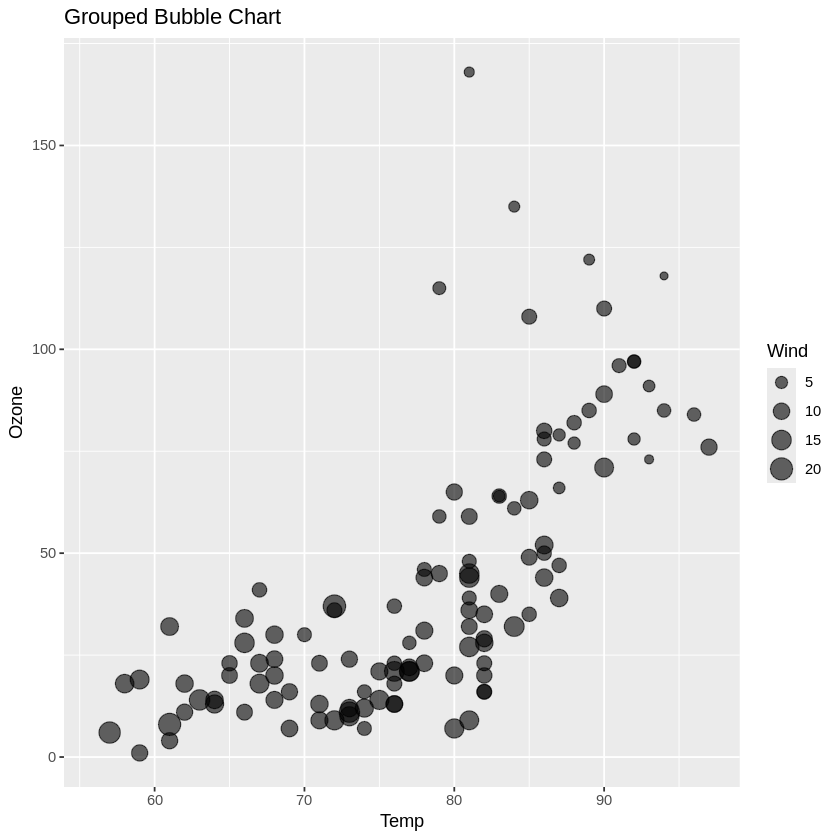

In [41]:
ggplot(airquality, aes(x = Temp, y = Ozone, size = Wind)) +
  geom_point(alpha = 0.6) +
  ggtitle("Grouped Bubble Chart")

3.8 Stacked Area Plot

Warning message:
“Removed 37 rows containing non-finite outside the scale range (`stat_align()`).”


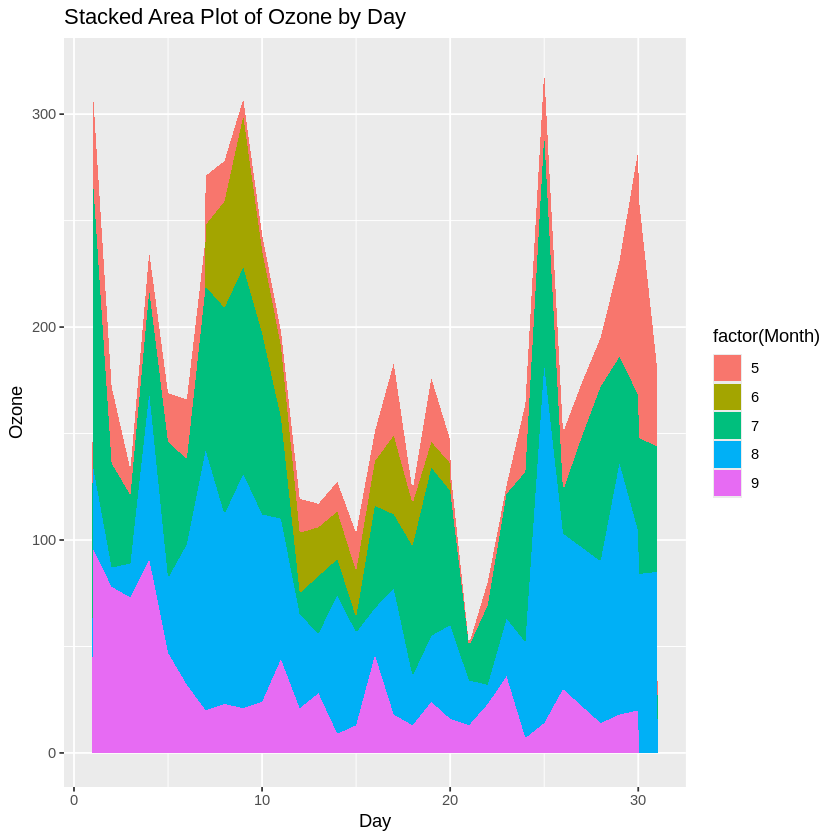

In [44]:
ggplot(airquality, aes(x = Day, y = Ozone, fill = factor(Month))) +
  geom_area() +
  ggtitle("Stacked Area Plot of Ozone by Day")

**4) Time Series Visualizations**

4.1 Time Series Line Plot

Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_line()`).”


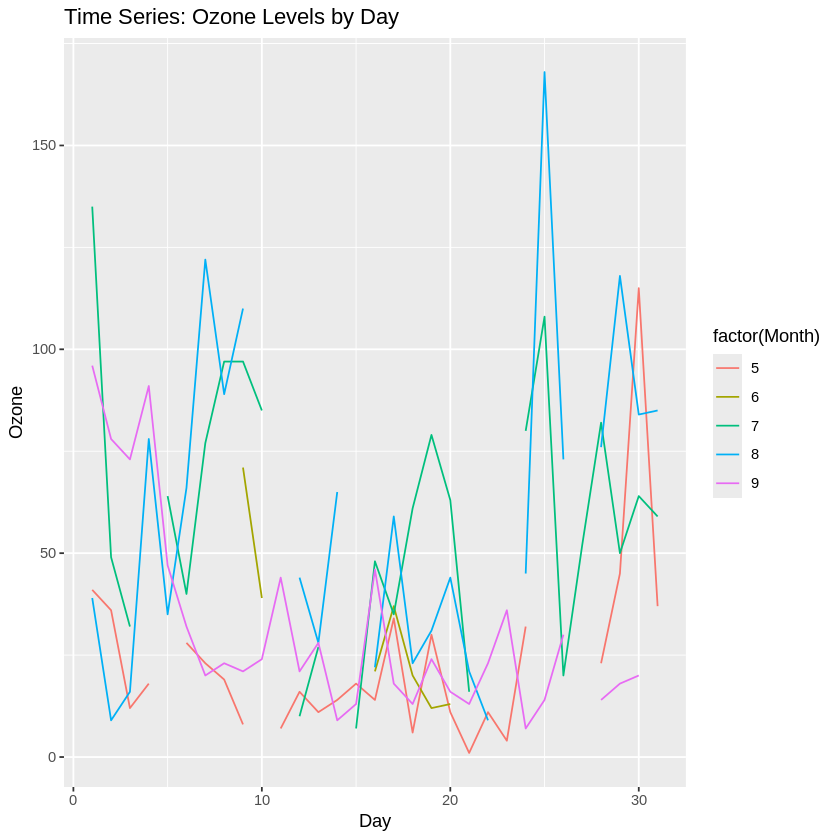

In [29]:
ggplot(airquality, aes(x = Day, y = Ozone, group = Month)) +
  geom_line(aes(color = factor(Month))) +
  ggtitle("Time Series: Ozone Levels by Day")

4.2 Area Plot

Warning message:
“Removed 37 rows containing non-finite outside the scale range (`stat_align()`).”


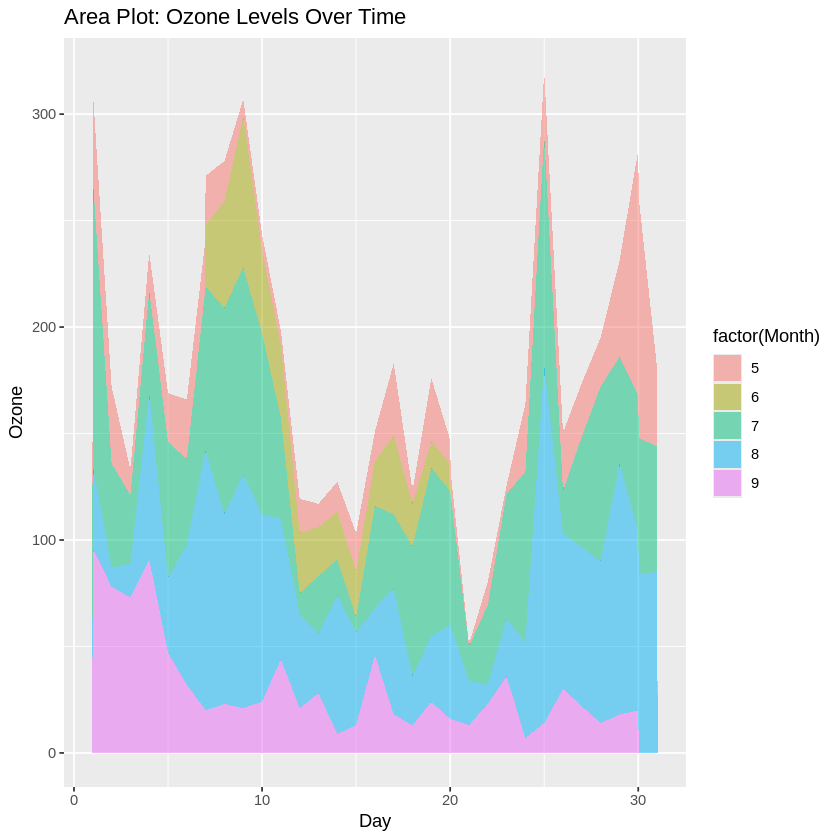

In [30]:
ggplot(airquality, aes(x = Day, y = Ozone, fill = factor(Month))) +
  geom_area(alpha = 0.5) +
  ggtitle("Area Plot: Ozone Levels Over Time")

4.3 Correlation Matrix (with dendrogram)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



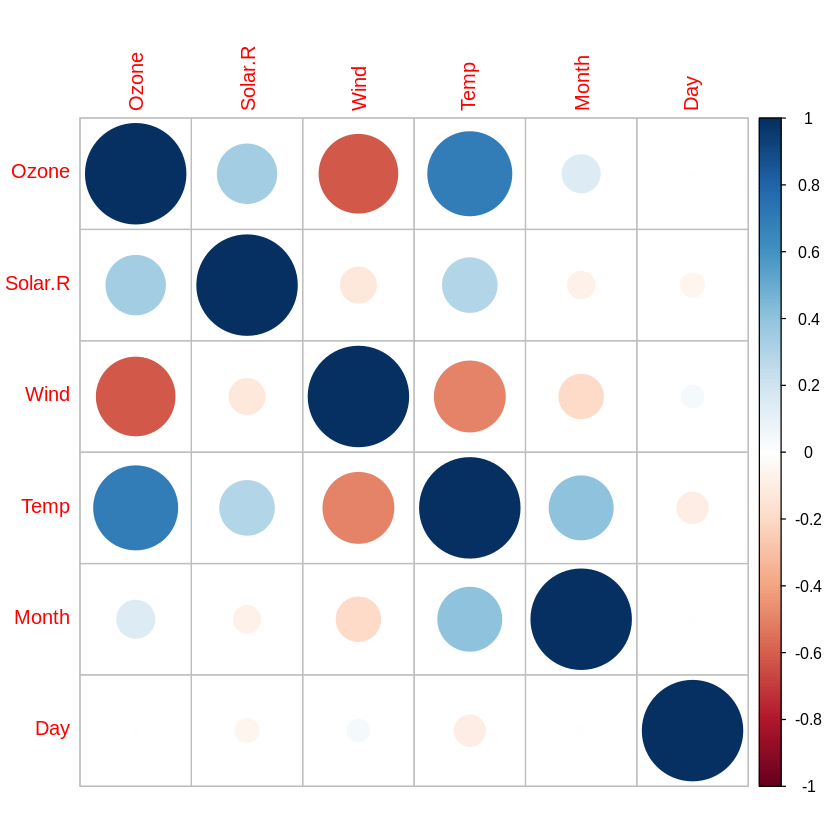

In [45]:
install.packages('corrplot')
library(corrplot)
cor_matrix <- cor(airquality[, sapply(airquality, is.numeric)], use = "complete.obs")
corrplot(cor_matrix, method = "circle", addrect = 2)

4.4 Radial Bar Chart

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_bar()`).”


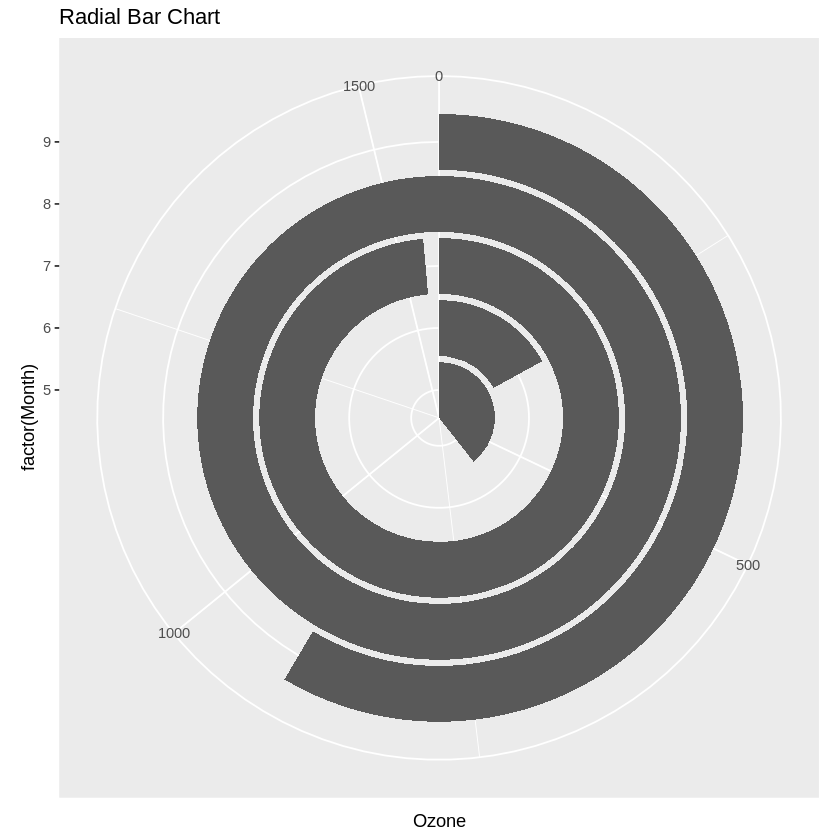

In [46]:
ggplot(airquality, aes(x = factor(Month), y = Ozone)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  ggtitle("Radial Bar Chart")

**5) Distribution Comparisons**

5.1 Grouped Boxplot

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


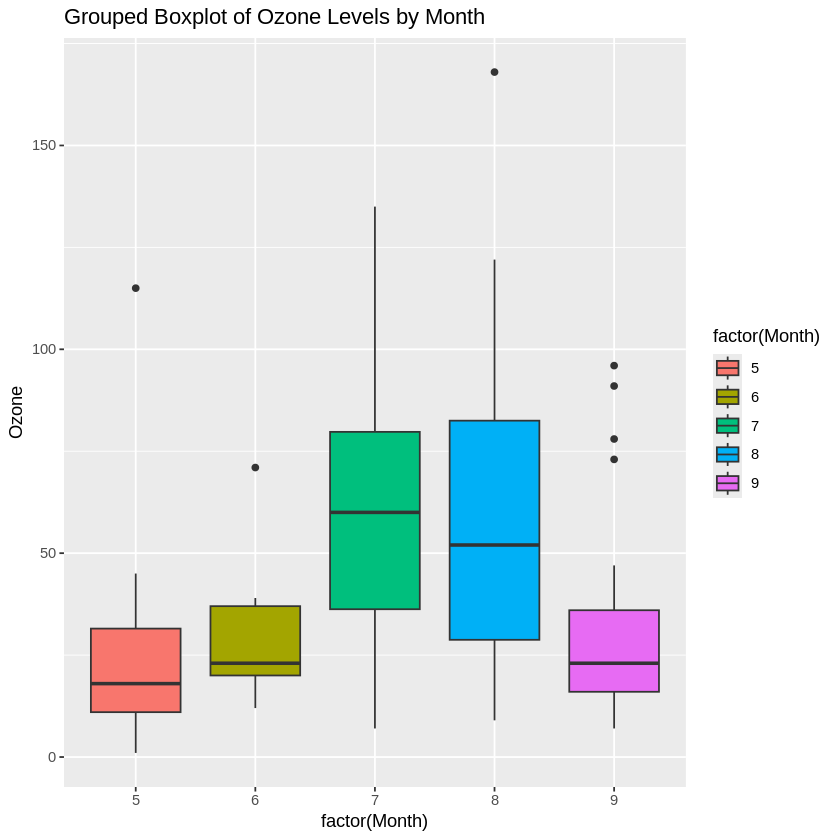

In [31]:
ggplot(airquality, aes(x = factor(Month), y = Ozone)) +
  geom_boxplot(aes(fill = factor(Month))) +
  ggtitle("Grouped Boxplot of Ozone Levels by Month")

5.2 Overlapping Density Plots

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_density()`).”


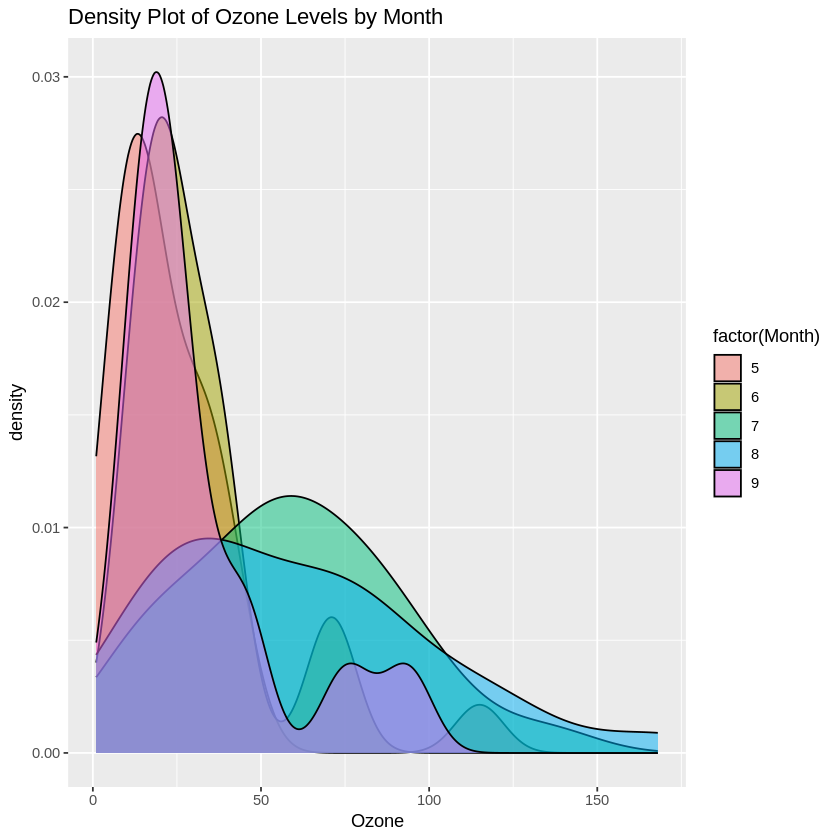

In [32]:
ggplot(airquality, aes(x = Ozone, fill = factor(Month))) +
  geom_density(alpha = 0.5) +
  ggtitle("Density Plot of Ozone Levels by Month")


6) Advanced Visualizations

6.1 Lollipop Chart

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_segment()`).”


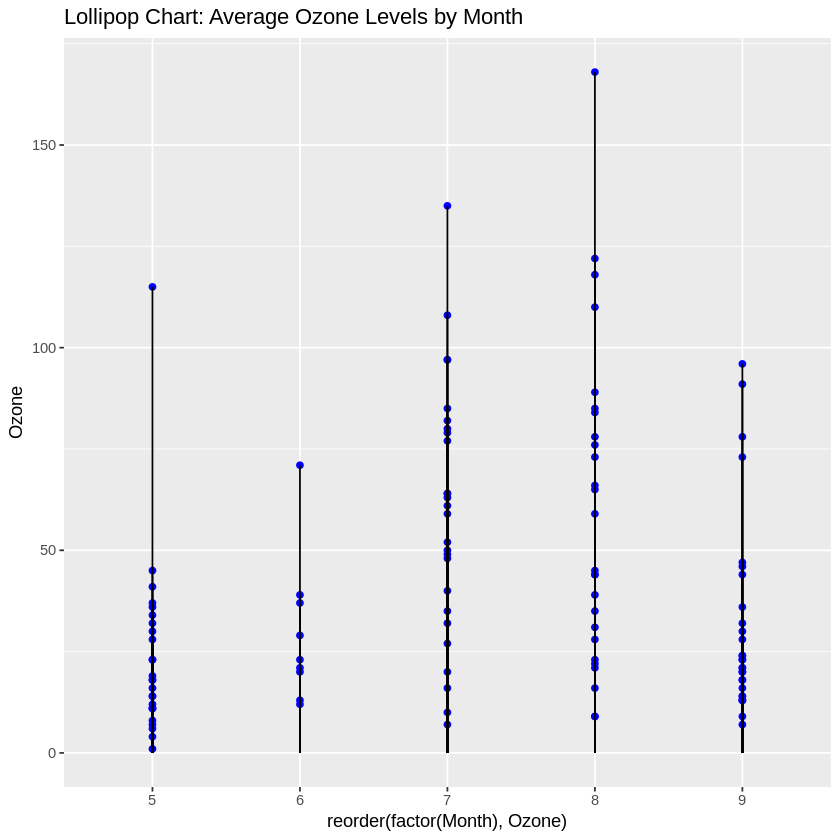

In [33]:
ggplot(airquality, aes(x = reorder(factor(Month), Ozone), y = Ozone)) +
  geom_point(color = "blue") +
  geom_segment(aes(xend = reorder(factor(Month), Ozone), yend = 0)) +
  ggtitle("Lollipop Chart: Average Ozone Levels by Month")

6.2 Ridgeline Plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Picking joint bandwidth of 11

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_density_ridges()`).”


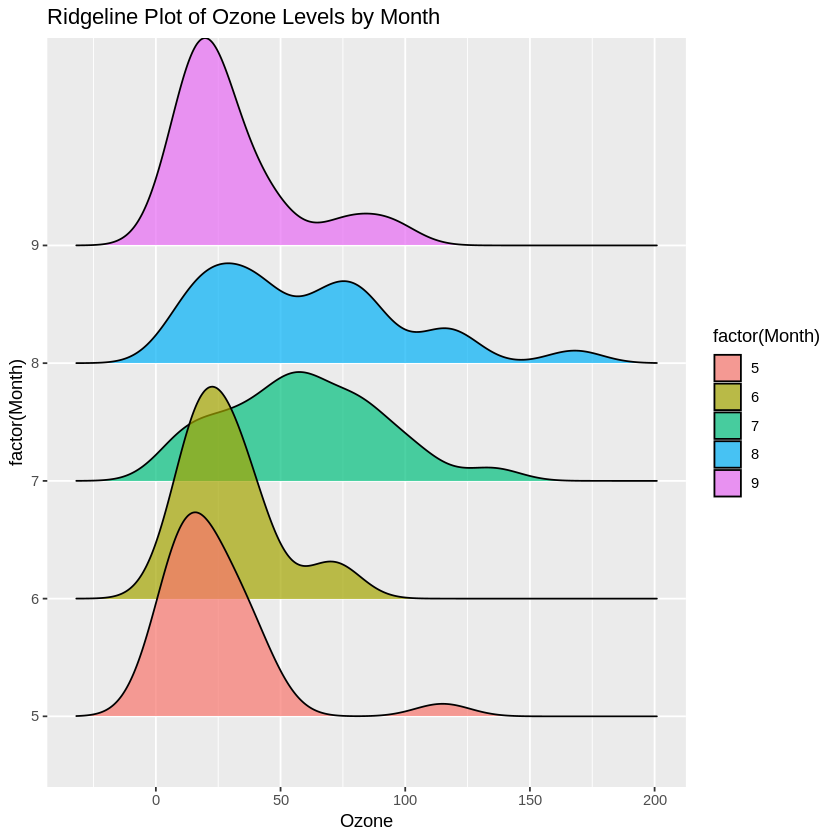

In [34]:
install.packages("ggridges")
library(ggridges)

ggplot(airquality, aes(x = Ozone, y = factor(Month), fill = factor(Month))) +
  geom_density_ridges(alpha = 0.7) +
  ggtitle("Ridgeline Plot of Ozone Levels by Month")